In [54]:
from keras.models import load_model 
model = load_model('radiology_lung_axis.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_input (Conv2D)        (None, 254, 510, 32)      896       
_________________________________________________________________
MaxPooling_from_input (MaxPo (None, 127, 255, 32)      0         
_________________________________________________________________
Conv2D_64 (Conv2D)           (None, 125, 253, 64)      18496     
_________________________________________________________________
MaxPooling2D_from_C64 (MaxPo (None, 62, 126, 64)       0         
_________________________________________________________________
Conv2D_128 (Conv2D)          (None, 60, 124, 128)      73856     
_________________________________________________________________
MaxPooling2D_from_C128 (MaxP (None, 30, 62, 128)       0         
_________________________________________________________________
Flatten (Flatten)            (None, 238080)            0         
__________

In [55]:
import os
from keras.preprocessing import image
import numpy as np
from keras import models 
import numpy as np
TARGET_SIZE=(256, 512, 3)

def load_image_tensor(img_path):
    img = image.load_img(img_path, target_size=TARGET_SIZE[0:2])
    print("{}".format(type(img)))

    img_tensor = image.img_to_array(img)
    print("{} {} {}".format(type(img_tensor), img_tensor.shape, img_tensor.max()))
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= img_tensor.max()
    print("{} {} {}".format(type(img_tensor), img_tensor.shape, img_tensor.max()))
    import matplotlib.pyplot as plt
    plt.imshow(img_tensor[0,:, :, :])
    plt.show()
    return img_tensor


In [56]:
def activate(img_tensor):
    layer_outputs = [layer.output for layer in model.layers[:8]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)
    print("{} {} {}".format(type(activations),len(activations), activations[0].shape))
    plt.matshow(activations[0][0, :, :, 0])
    plt.matshow(activations[5][0, :, :, 127])
    return activations

In [57]:
import matplotlib.pyplot as plt

def display_activations(model, activations):
    layer_names = list()
    for layer in model.layers[:6]:
        layer_names.append(layer.name)

    print("{}".format(layer_names))
    images_per_row = 16
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1] # last item
        row_size = layer_activation.shape[1]
        col_size = layer_activation.shape[2]
        n_cols = n_features // images_per_row
        # print("activation shape {}".format(layer_activation.shape))
        # print("n_features {} div per_row {} = n_cols {}".format(n_features, images_per_row, n_cols))
        # print("size {} * n_cols {} = {}, size {} * per_row {} = {}".format(
        #    size, n_cols, size*n_cols, size, images_per_row, size*images_per_row))
        display_grid = np.zeros((row_size*n_cols, col_size*images_per_row))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col*images_per_row+row]
                # print("{}=/-{}".format(channel_image.mean(), channel_image.std()))
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                # print("noramlized {}=/-{}".format(channel_image.mean(), channel_image.std()))
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                # print("grid {} channel_image {}".format((row_size, col_size), channel_image.shape))
                display_grid[col*row_size:(col+1)*row_size,
                             row*col_size:(row+1)*col_size] = channel_image
        scale = 1.0 / col_size
        plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [58]:
def display_image_activations(img_path, model):
    img_tensor = load_image_tensor(img_path)
    activations = activate(img_tensor)
    display_activations(model=model, activations=activations)

In [59]:
base_dir = '/home/ktdiedrich/Documents/localData/RadiologyImages/LIDC-IDRI/slice_images'

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (256, 512, 3) 255.0
<class 'numpy.ndarray'> (1, 256, 512, 3) 1.0


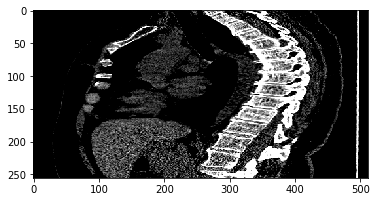

<class 'list'> 8 (1, 254, 510, 32)
['Conv2D_input', 'MaxPooling_from_input', 'Conv2D_64', 'MaxPooling2D_from_C64', 'Conv2D_128', 'MaxPooling2D_from_C128']


/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


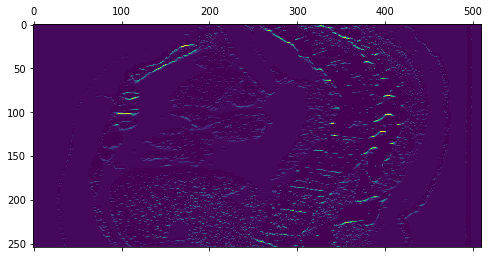

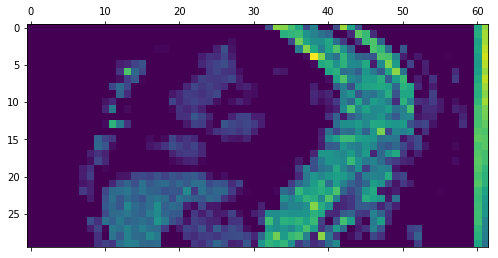

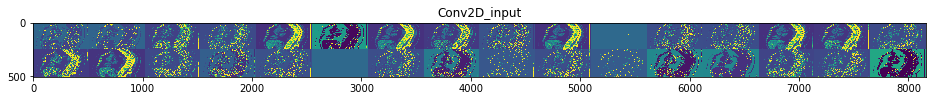

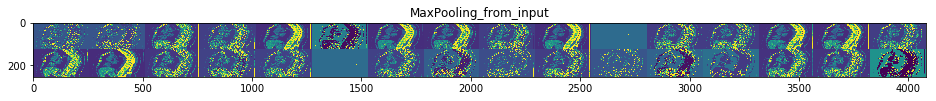

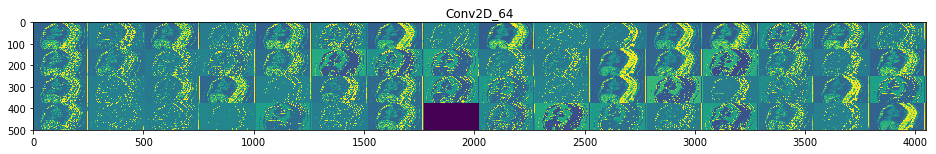

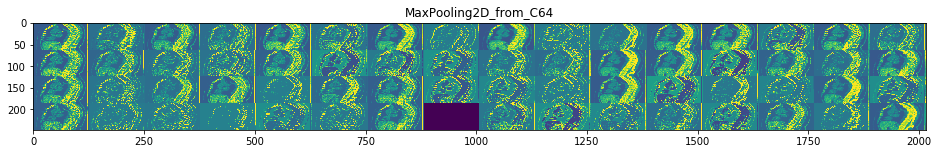

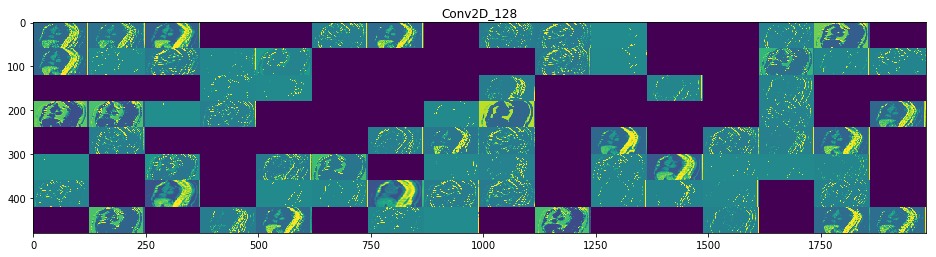

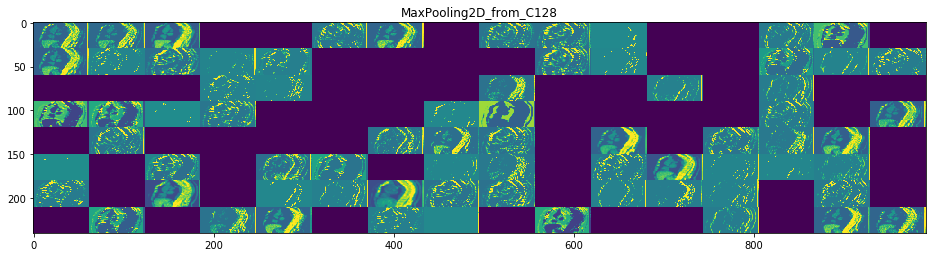

In [60]:
display_image_activations(img_path=os.path.join(base_dir, 'test/2', 'LIDC-IDRI-0406.2.slice.png'), 
                          model=model)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (256, 512, 3) 255.0
<class 'numpy.ndarray'> (1, 256, 512, 3) 1.0


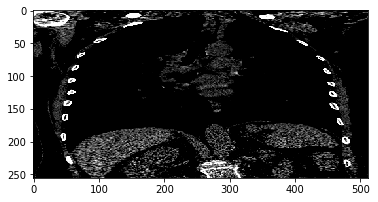

<class 'list'> 8 (1, 254, 510, 32)
['Conv2D_input', 'MaxPooling_from_input', 'Conv2D_64', 'MaxPooling2D_from_C64', 'Conv2D_128', 'MaxPooling2D_from_C128']


/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


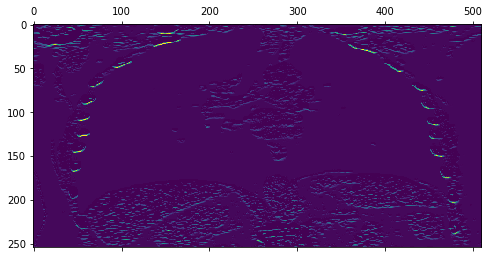

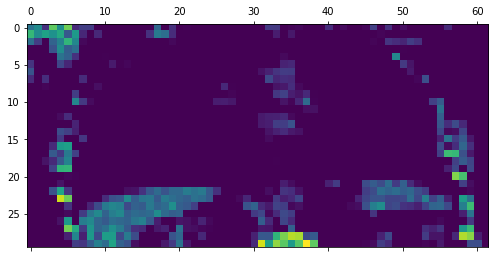

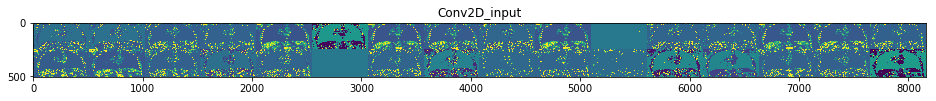

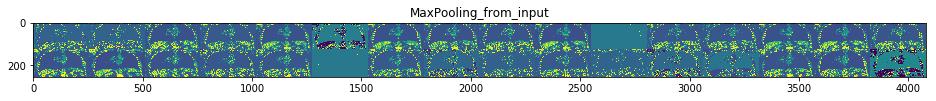

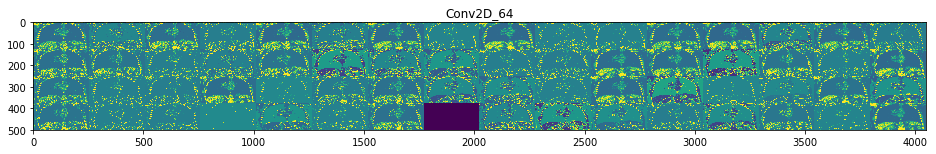

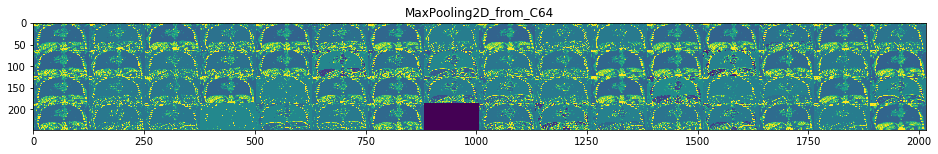

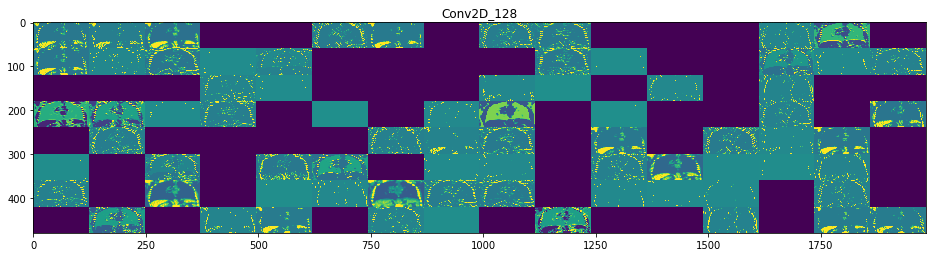

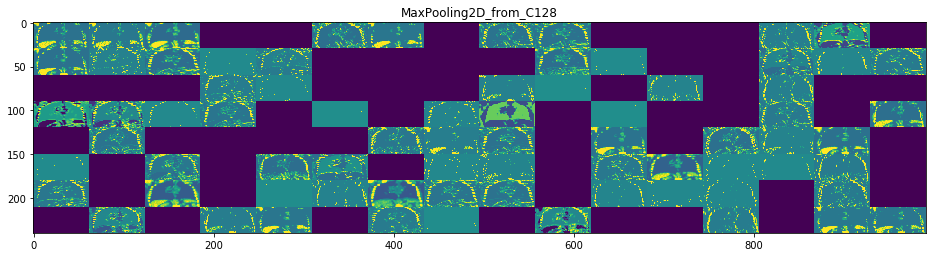

In [61]:
display_image_activations(img_path=os.path.join(base_dir, 'test/1', 'LIDC-IDRI-0406.1.slice.png'), 
                          model=model)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (256, 512, 3) 255.0
<class 'numpy.ndarray'> (1, 256, 512, 3) 1.0


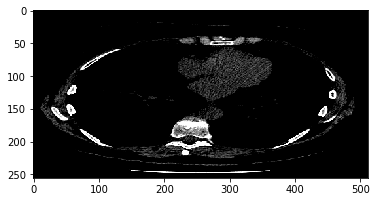

<class 'list'> 8 (1, 254, 510, 32)
['Conv2D_input', 'MaxPooling_from_input', 'Conv2D_64', 'MaxPooling2D_from_C64', 'Conv2D_128', 'MaxPooling2D_from_C128']


/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


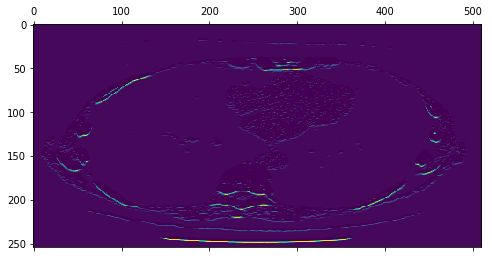

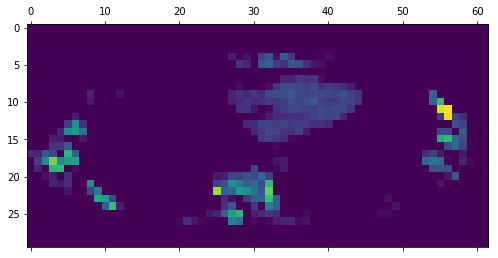

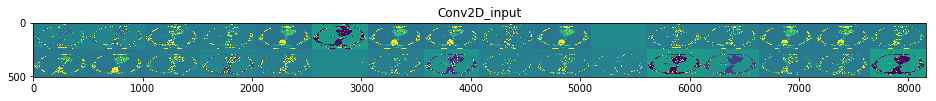

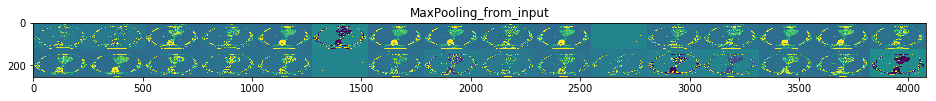

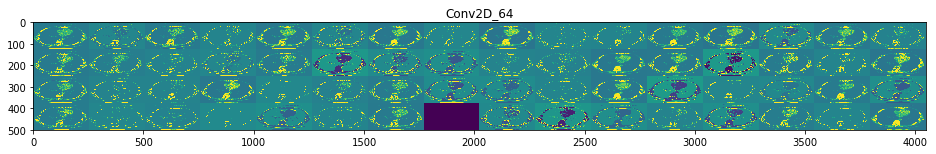

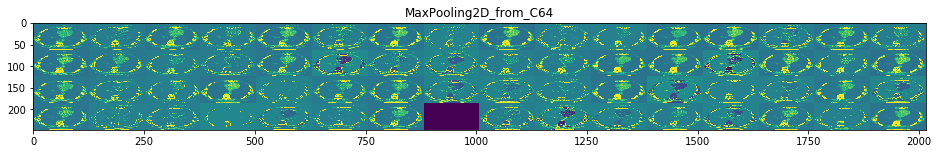

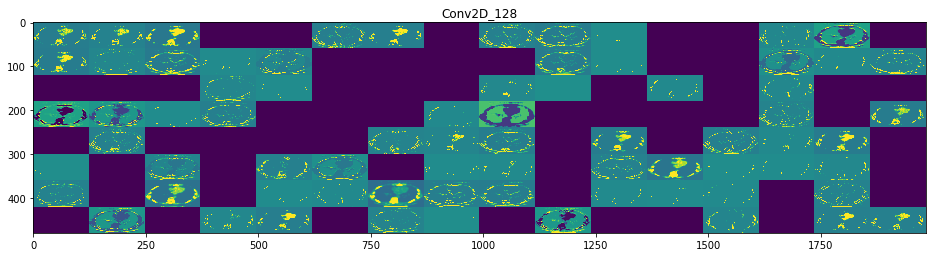

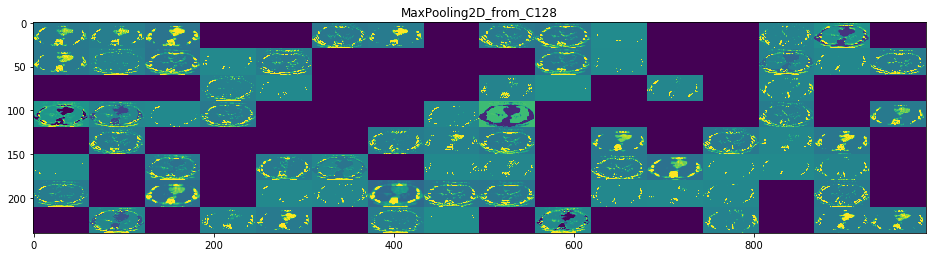

In [62]:
display_image_activations(img_path=os.path.join(base_dir, 'test/0', 'LIDC-IDRI-0406.0.slice.png'), 
                          model=model)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (256, 512, 3) 255.0
<class 'numpy.ndarray'> (1, 256, 512, 3) 1.0


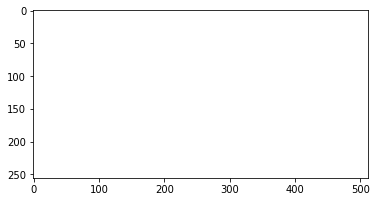

<class 'list'> 8 (1, 254, 510, 32)
['Conv2D_input', 'MaxPooling_from_input', 'Conv2D_64', 'MaxPooling2D_from_C64', 'Conv2D_128', 'MaxPooling2D_from_C128']


/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


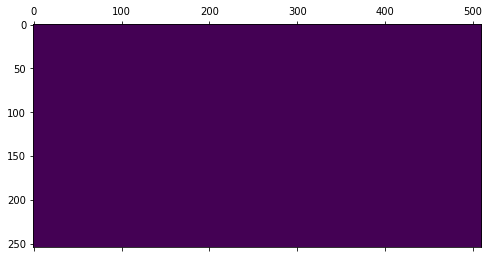

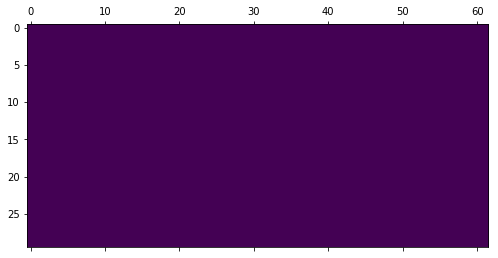

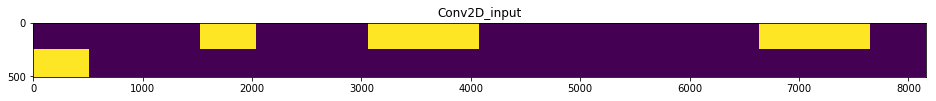

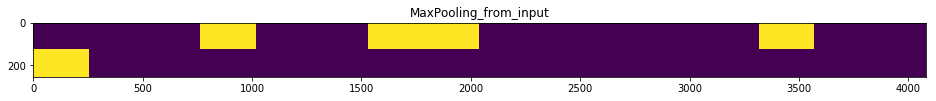

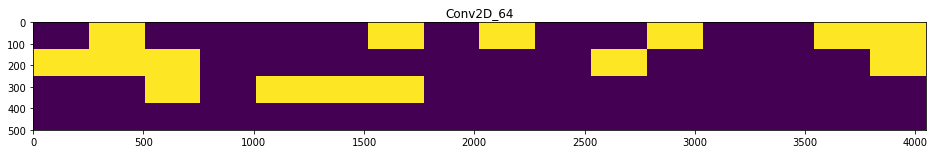

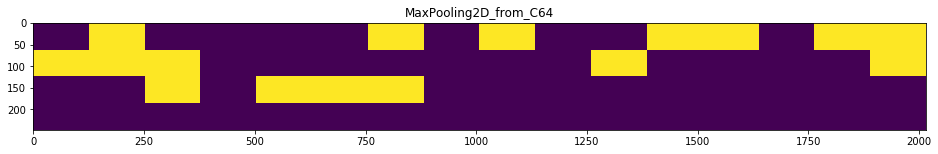

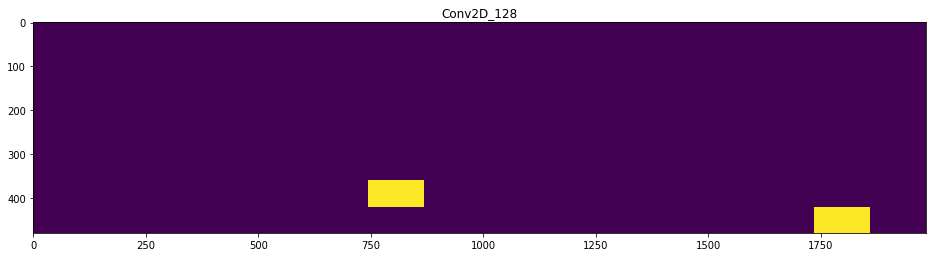

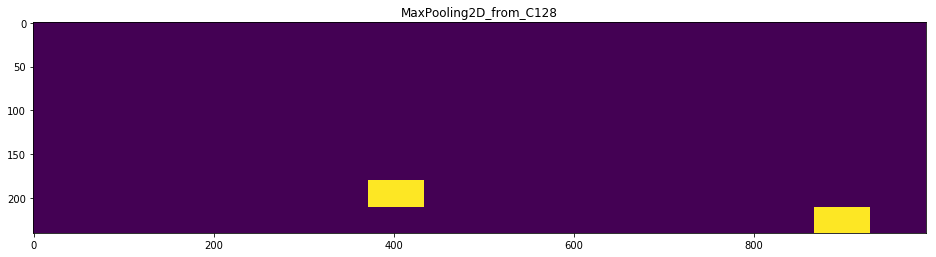

In [63]:
display_image_activations(img_path=os.path.join(base_dir, 'test/xray', 'LIDC-IDRI-0100.xray.png'), 
                          model=model)

In [64]:
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_input (Conv2D)        (None, 254, 510, 32)      896       
_________________________________________________________________
MaxPooling_from_input (MaxPo (None, 127, 255, 32)      0         
_________________________________________________________________
Conv2D_64 (Conv2D)           (None, 125, 253, 64)      18496     
_________________________________________________________________
MaxPooling2D_from_C64 (MaxPo (None, 62, 126, 64)       0         
_________________________________________________________________
Conv2D_128 (Conv2D)          (None, 60, 124, 128)      73856     
_________________________________________________________________
MaxPooling2D_from_C128 (MaxP (None, 30, 62, 128)       0         
_________________________________________________________________
Flatten (Flatten)            (None, 238080)            0         
__________

In [65]:
from keras import backend as K

layer_name = 'MaxPooling2D_from_C128';
filter_index = 0;
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [loss, grads])
INPUT_SHAPE = (1, TARGET_SIZE[0], TARGET_SIZE[1], TARGET_SIZE[2])
loss_value, grads_value = iterate([np.zeros(INPUT_SHAPE)])
input_img_data = np.random.random(INPUT_SHAPE) * 20 + 128
step = 1.0

for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step 
    

In [72]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    #x *= 0.1
    #x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

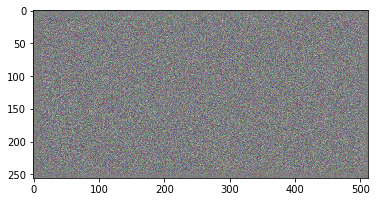

In [73]:
def generate_pattern(layer_name, filter_index, row_size=256, col_size=512):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-05)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, row_size, col_size, 3)) * 20 + 128.0
    step = 1.0
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        # print("{} + {}".format(input_img_data.shape, grads_value.shape))
        input_img_data += (grads_value * step )
    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('Conv2D_128', 0))

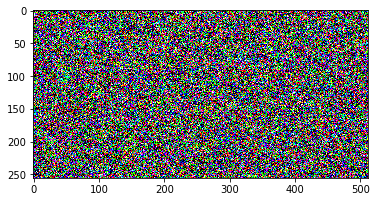

In [68]:
plt.imshow(generate_pattern('Conv2D_input', 0))

In [74]:
layer_name = 'MaxPooling2D_from_C128'

def response_pattern(layer_name):
    size = 64
    margin = 5


    results = np.zeros((8*size+7*margin, 8*size+7*margin, 3))

    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i+(j*8), row_size=size, col_size=size)

            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j*margin 
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end,
                   vertical_start:vertical_end, :] = filter_img    
    plt.figure(figsize=(20,20))
    plt.imshow(results)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


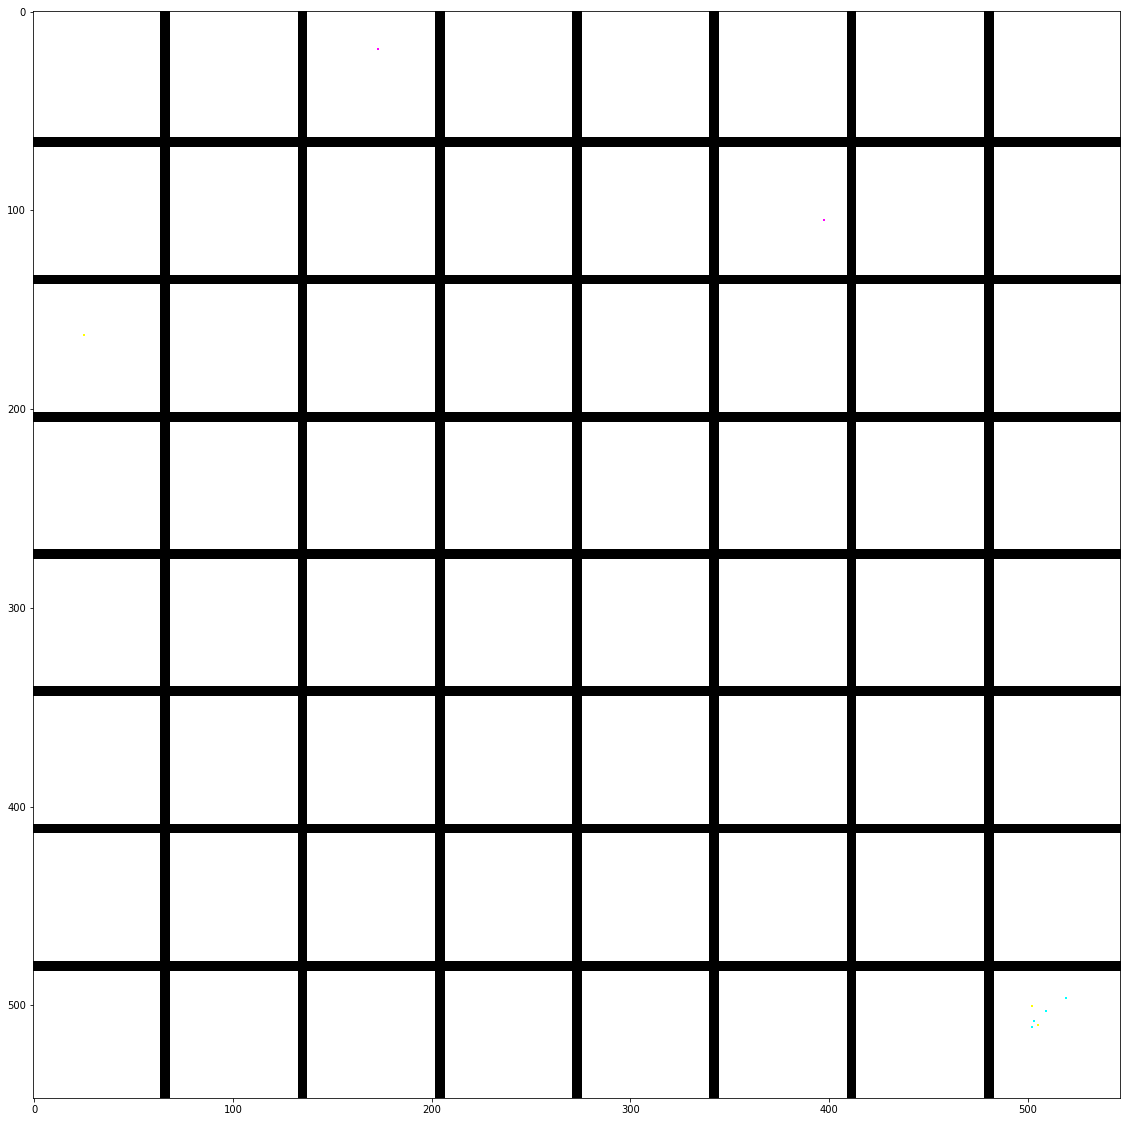

In [75]:
response_pattern('MaxPooling2D_from_C128')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


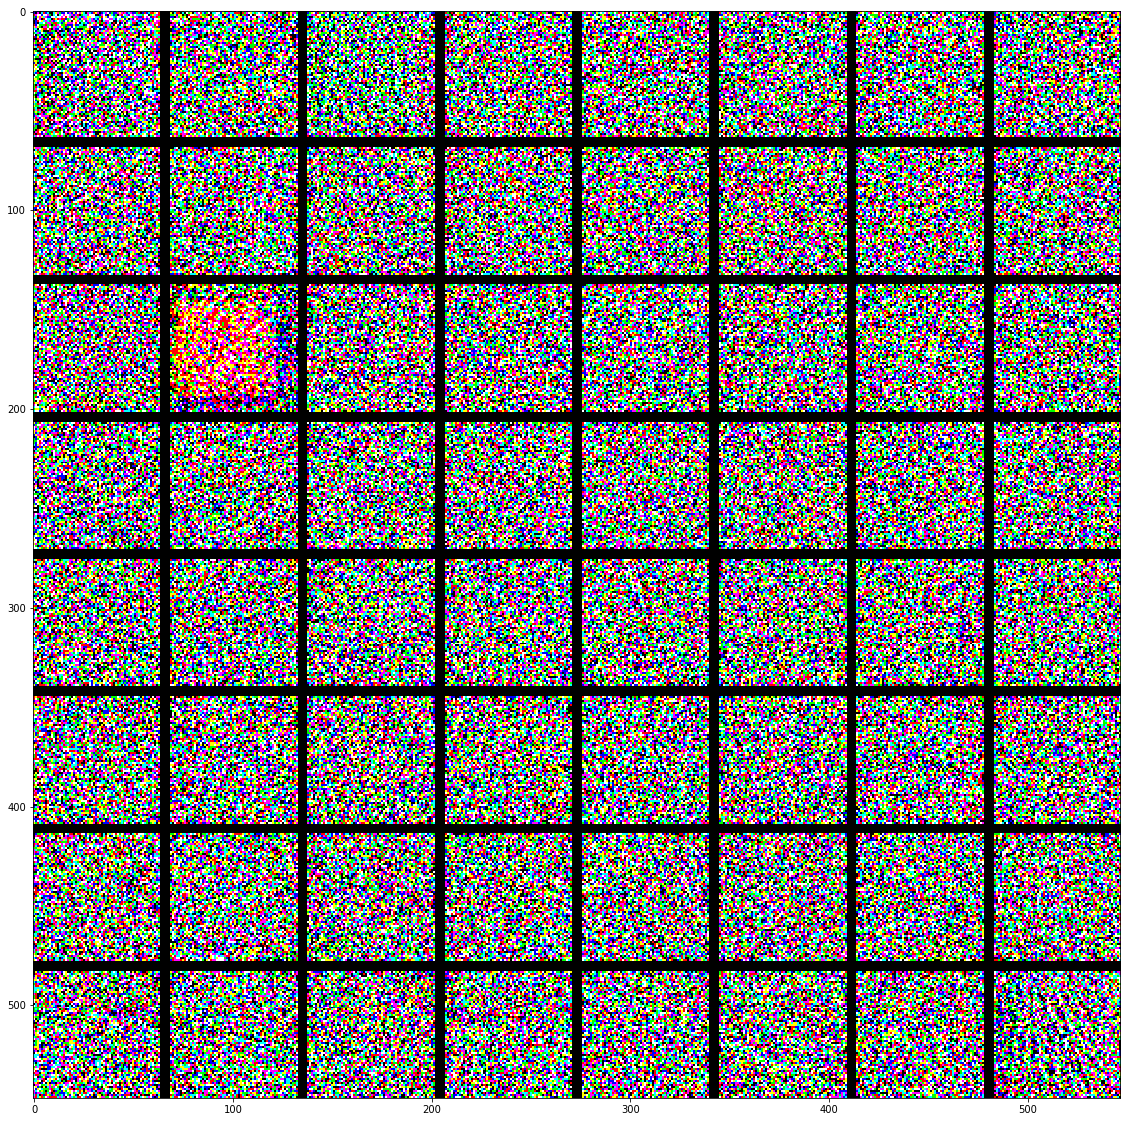

In [71]:
response_pattern("Conv2D_128")